Visualization

### EXPLORATORY DATA ANALYSIS

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
##Reading proceessed data
the_titanic_df = pd.read_csv("../datasets/preprocessed_dataset/stage_data.csv")
the_titanic_df.head(10)

,sn,pclass,survived,name,gender,age,family,fare,embarked,date
0,1,3,0,Mr. Anthony,male,42.0,0.0,7.5500,S,01-Jan-90
1,2,3,0,Master. Eugene Joseph,male,29.0,2.0,20.2500,S,02-Jan-90
2,3,2,0,"Abbott, Mr. Rossmore Edward",male,29.0,2.0,33.0000,S,03-Jan-90
3,5,3,1,"Abelseth, Miss. Karen Marie",female,16.0,0.0,7.6500,S,05-Jan-90
4,6,3,1,"Abelseth, Mr. Olaus Jorgensen",male,25.0,0.0,7.6500,S,06-Jan-90
5,7,2,0,"Abelson, Mr. Samuel",male,30.0,1.0,24.0000,C,07-Jan-90
6,8,2,1,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1.0,24.0000,C,08-Jan-90
7,9,3,1,"Abrahamsson, Mr. Abraham August Johannes",male,20.0,0.0,7.9250,S,09-Jan-90
8,10,3,1,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0.0,7.2292,C,10-Jan-90
9,11,3,0,"Adahl, Mr. Mauritz Nils Martin",male,30.0,0.0,7.2500,S,11-Jan-90


# Titanic Basic Analysis

This feature provides a basic analysis of the the dataset
1.  Visualization of age distribution among Titanic passengers.
2.  Examination of gender-based distribution across passenger classes.
3.  Analysis of survival rates across different passenger classes.

In [26]:
print(the_titanic_df.info())
#finding info from categorical data
print(the_titanic_df.describe())
print(the_titanic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1297 entries, 0 to 1296
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sn        1297 non-null   int64  
 1   pclass    1297 non-null   int64  
 2   survived  1297 non-null   int64  
 3   name      1297 non-null   object 
 4   gender    1297 non-null   object 
 5   age       1297 non-null   float64
 6   family    1297 non-null   float64
 7   fare      1297 non-null   float64
 8   embarked  1297 non-null   object 
 9   date      1297 non-null   object 
dtypes: float64(3), int64(3), object(4)
memory usage: 101.5+ KB
None
                sn       pclass     survived          age       family  \
count  1297.000000  1297.000000  1297.000000  1297.000000  1297.000000   
mean    651.299923     2.287587     0.384734    29.760154     0.889746   
std     375.271778     0.838746     0.486720    12.875063     1.588742   
min       1.000000     1.000000     0.000000     0.170000   

In [ ]:
#Save the cleaned and explored dataset to a CSV file in the working directory
# the_titanic_df.to_csv('/home/thetwumasi/Desktop/workdev/Titanic_Survival_Prediction_Analysis/cleaned_and_explored_titanic_data.csv', index=False)

# print("Cleaned and explored dataset saved as 'cleaned_and_explored_titanic_data.csv' in the working directory.")

In [ ]:
# the_titanic_df['survived'] = pd.to_numeric(the_titanic_df['survived'], errors='coerce')

# Exploring The Relationship Between Features and Survival

### Aggregating Titanic survival data by passenger class.

In [27]:

survivor_counts_per_pclass = the_titanic_df.groupby('pclass').agg(
    survivor_count=('survived', 'count'),
    survivor_sum=('survived', 'sum'),
    survivor_rate=('survived', 'mean')
)
survivor_counts_per_pclass

,survivor_count,survivor_sum,survivor_rate
pclass,,,
1,323,200,0.619195
2,278,119,0.428058
3,696,180,0.258621


### Analyzing survival data based on gender and passenger class.

In [31]:
the_titanic_df.groupby(['gender'], as_index=False)['survived'].agg(['count', 'sum','mean'])
gender_class_survival = the_titanic_df.groupby(['pclass', 'gender'])['survived'].agg(['count', 'sum','mean'])
print(gender_class_survival)

               count  sum      mean
pclass gender                      
1      female    144  139  0.965278
       male      179   61  0.340782
2      female    106   94  0.886792
       male      172   25  0.145349
3      female    213  105  0.492958
       male      483   75  0.155280


### Analyzing average fare by passenger class.

In [33]:
the_titanic_df.groupby(['pclass'], as_index=False)['fare'].mean()

,pclass,fare
0,1,87.508992
1,2,21.221717
2,3,13.397114


### Analyzing survival statistics based on family size.

In [81]:
family_class_survival = the_titanic_df.groupby(['family'])['survived'].agg(['count', 'sum', 'mean'])
print(family_class_survival)

        count  sum      mean
family                      
0.0       780  239  0.306410
1.0       234  126  0.538462
2.0       158   89  0.563291
3.0        43   30  0.697674
4.0        22    6  0.272727
5.0        25    5  0.200000
6.0        16    4  0.250000
7.0         8    0  0.000000
10.0       11    0  0.000000


In [52]:
s=the_titanic_df.groupby(['fare'], as_index=False)['survived'].mean()

s

,fare,survived
0,0.0000,0.117647
1,3.1708,1.000000
2,4.0125,0.000000
3,5.0000,0.000000
4,6.2375,0.000000
...,...,...
276,227.5250,0.600000
277,247.5208,0.666667
278,262.3750,0.857143
279,263.0000,0.666667


### Analyzing survival rates based on embarkation point.

In [54]:
embarked_stats = the_titanic_df.groupby('embarked').agg(
    stotal_passengers=('survived', 'count'),
    survivors=('survived', 'sum'),
    survivor_rate=('survived', 'mean')
)
embarked_stats

,stotal_passengers,survivors,survivor_rate
embarked,,,
C,267,150,0.561798
Q,122,44,0.360656
S,908,305,0.335903


### Analyzing the distribution of passengers by embarkation point and class.

In [61]:
embarked_pclass = the_titanic_df.groupby(['embarked', 'pclass']).size().unstack()
embarked_pclass

pclass,1,2,3
embarked,,,
C,141,28,98
Q,3,7,112
S,179,243,486


### Calculating the average fare for each embarkation point.

In [62]:
the_titanic_df.groupby('embarked')['fare'].mean()

embarked
C    62.901328
Q    12.448191
S    27.726981
Name: fare, dtype: float64

#### Visualization of Findings from Analysis

#### passenger class average survival rate

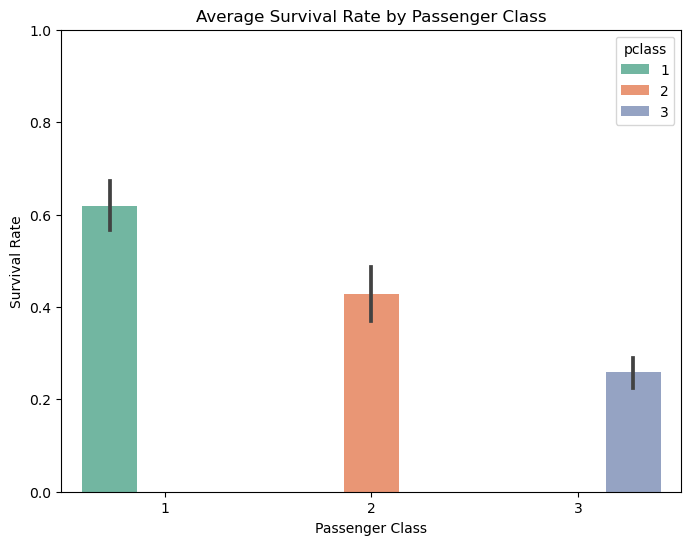

In [67]:
# Create a bar plot to visualize the average survival rate by passenger class
plt.figure(figsize=(8, 6))
sns.barplot(x='pclass', y='survived', data=the_titanic_df, hue='pclass', palette='Set2')   
plt.title('Average Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.ylim(0, 1)
plt.show()

#### average survival rate of gender distribution

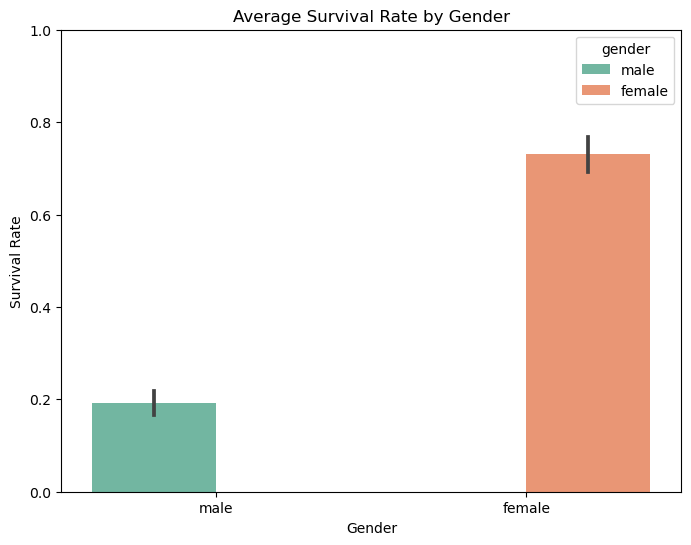

In [68]:
# Create a barplot to visualize survival rate by gender
plt.figure(figsize=(8, 6))
sns.barplot(x='gender', y='survived', data=the_titanic_df, hue='gender', palette='Set2')
plt.title('Average Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.xlabel('Gender')
plt.ylim(0, 1)
plt.show()

#### Average Survival Rate by Age

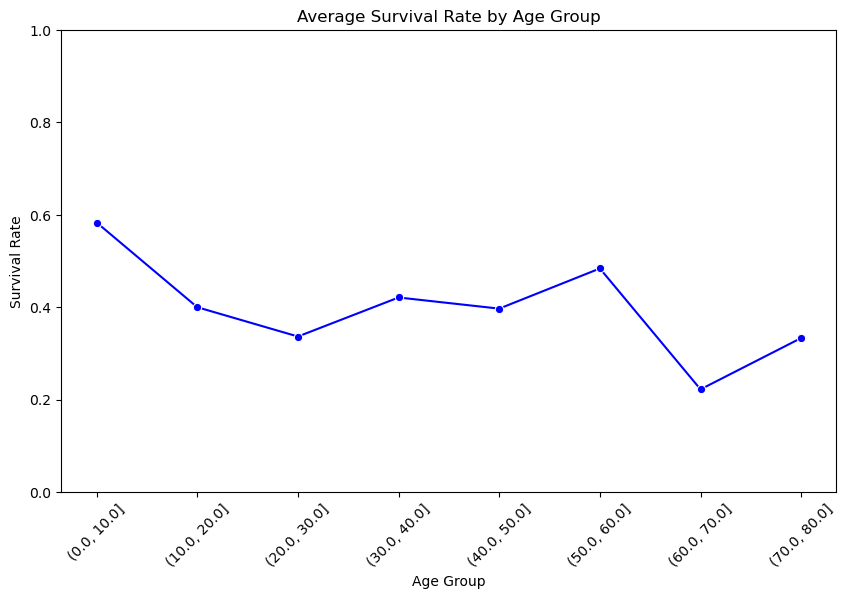

In [72]:
# Bin the age into categories
age_bins = np.arange(0, the_titanic_df['age'].max() + 10, 10)  # Creating age bins of 10 years
the_titanic_df['age_group'] = pd.cut(the_titanic_df['age'], bins=age_bins)
age_survival = the_titanic_df.groupby('age_group')['survived'].mean().reset_index()

age_survival['age_group'] = age_survival['age_group'].astype(str)

# Plot the survival rate by age group
plt.figure(figsize=(10, 6))
sns.lineplot(x='age_group', y='survived', data=age_survival, marker='o', color='b')

plt.title('Average Survival Rate by Age Group')
plt.ylabel('Survival Rate')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

#### Average Survival Rate by Age

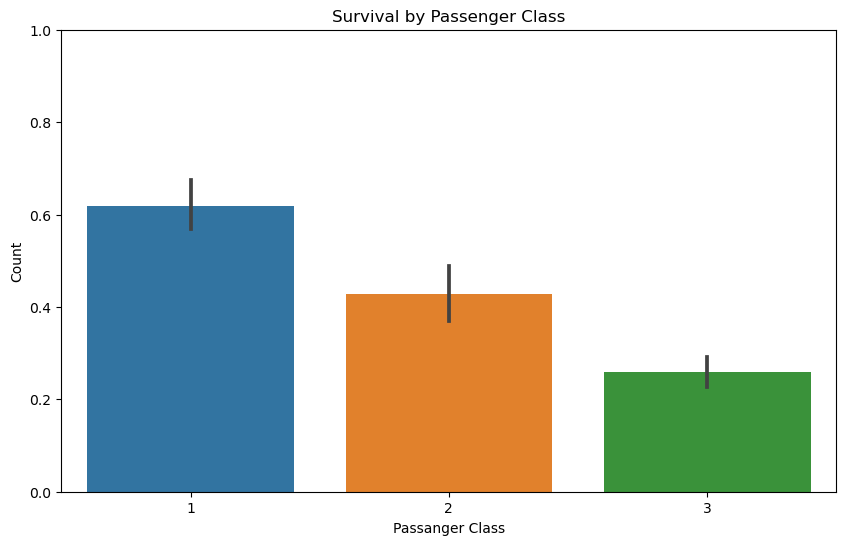

In [75]:
plt.figure(figsize=(10, 6))
sns.barplot(x='pclass', y='survived', data=the_titanic_df,)
plt.title('Survival by Passenger Class')
plt.ylabel('Count')
plt.xlabel('Passanger Class')
plt.ylim(0, 1)
plt.show()

#### heat map of relevant features..numerical values

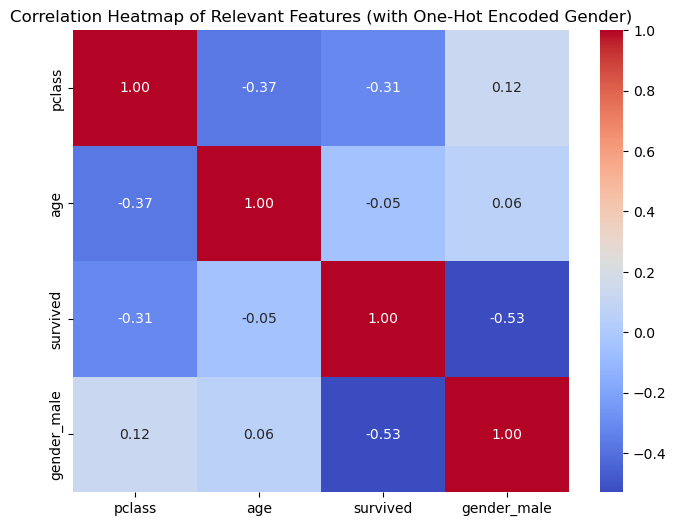

In [79]:
relevant_features = ['pclass', 'age', 'gender', 'survived']
data = the_titanic_df[relevant_features].copy()
data = pd.get_dummies(data, columns=['gender'], drop_first=True)
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Heatmap of Relevant Features (with One-Hot Encoded Gender)')
plt.show()

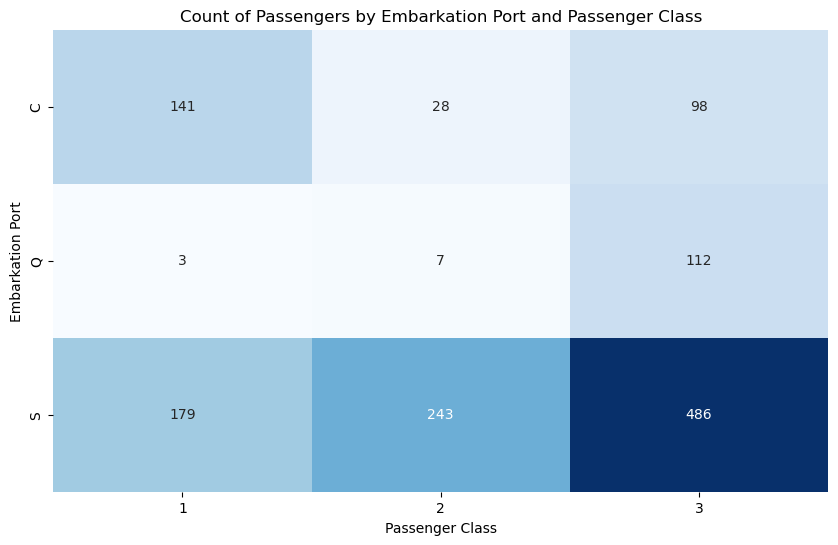

In [76]:
# Heatmap to show the count of passengers per embarkation port and passenger class
plt.figure(figsize=(10, 6))
sns.heatmap(embarked_pclass, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Count of Passengers by Embarkation Port and Passenger Class')
plt.ylabel('Embarkation Port')
plt.xlabel('Passenger Class')
plt.show()

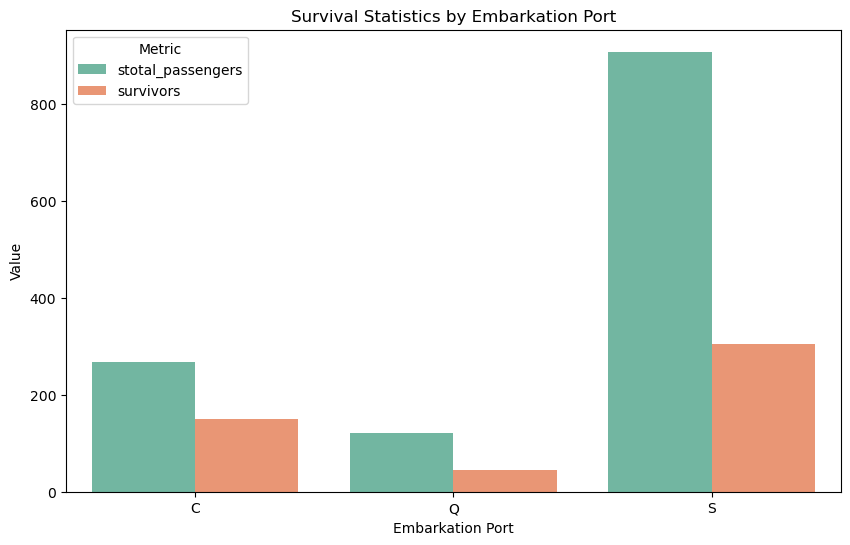

In [78]:
# Bar plot for survival statistics by embarkation port
embarked_stats = embarked_stats.reset_index()  # Reset index to make 'embarked' a column for plotting
embarked_stats_melted = embarked_stats.melt(id_vars='embarked', value_vars=['stotal_passengers', 'survivors'],
                                             var_name='Metric', value_name='Value')

plt.figure(figsize=(10, 6))
sns.barplot(x='embarked', y='Value', hue='Metric', data=embarked_stats_melted, palette='Set2')
plt.title('Survival Statistics by Embarkation Port')
plt.ylabel('Value')
plt.xlabel('Embarkation Port')
plt.show()

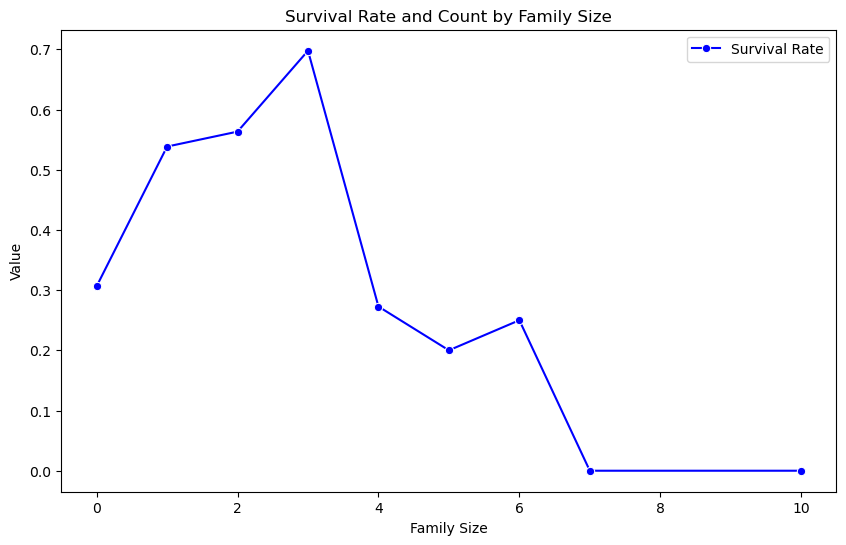

In [83]:
# family_class_survival = the_titanic_df.groupby('family')['survived'].agg(['count', 'sum', 'mean']).reset_index()

# Plotting the survival statistics for different family sizes
plt.figure(figsize=(10, 6))
sns.lineplot(x='family', y='mean', data=family_class_survival, marker='o', color='b', label='Survival Rate')
# sns.lineplot(x='family', y='count', data=family_class_survival, marker='x', color='r', label='Passenger Count')
plt.title('Survival Rate by Family Size')
plt.ylabel('Value')
plt.xlabel('Family Size')
plt.legend()
plt.show()

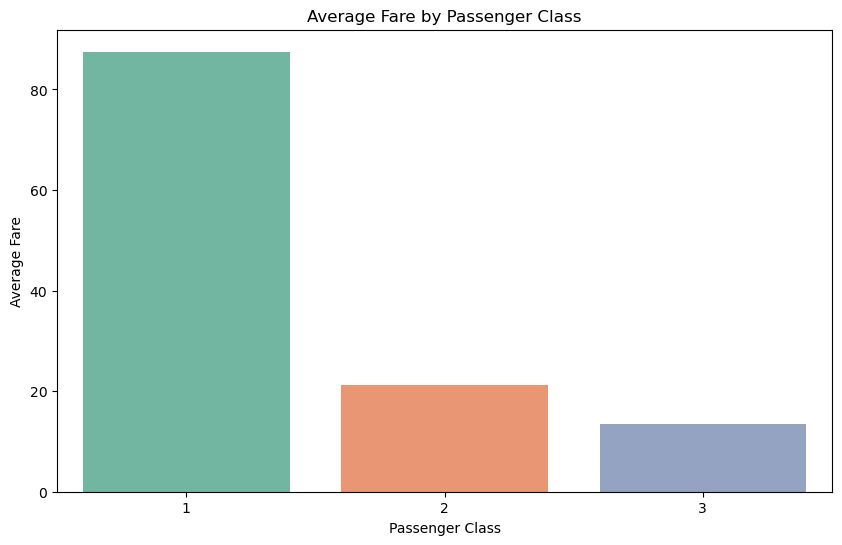

In [84]:
# Group by passenger class and calculate the mean fare
pclass_fare = the_titanic_df.groupby('pclass')['fare'].mean().reset_index()

# Plotting the average fare by passenger class
plt.figure(figsize=(10, 6))
sns.barplot(x='pclass', y='fare', data=pclass_fare, palette='Set2')
plt.title('Average Fare by Passenger Class')
plt.ylabel('Average Fare')
plt.xlabel('Passenger Class')
plt.show()